# 🎯 Objective:
To predict whether an individual's income exceeds $50K/year using classification models based on demographic and work-related features from the Adult Income dataset.
To apply machine learning techniques to classify income levels from demographic and employment features.
To explore the impact of various socio-economic factors on individual income categories.
To clean, analyze, and model the UCI Adult dataset for income prediction.

Source:https://github.com/TatobaPadhare33/Adult-Income-Classification-with-Machine-Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Load the Dataset

In [2]:
# import csv file
df = pd.read_csv('Adult Income dataset.csv', encoding= 'unicode_escape')

# Clean and Preprocess the Data

In [3]:
df.shape

(48842, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
#check for null values
pd.isnull(df).sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
# Drop irrelevant column
df.drop(['fnlwgt'], axis=1, inplace=True)

In [9]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation',
                       'relationship', 'race', 'sex', 'native-country', 'income']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000
mean,38.640684,3.946893,10.290040,10.090821,2.606602,6.704395,1.432141,3.671489,0.670650,1091.137649,87.853489,40.600050,36.946284,0.800949
std,13.558961,1.371859,3.856378,2.568320,1.505946,4.168429,1.601278,0.842198,0.469982,7487.228336,404.010612,12.260345,7.311473,0.977210
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,1.000000
max,90.000000,8.000000,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,3.000000


# Exploratory Data Analysis (EDA)

### Income by Gender

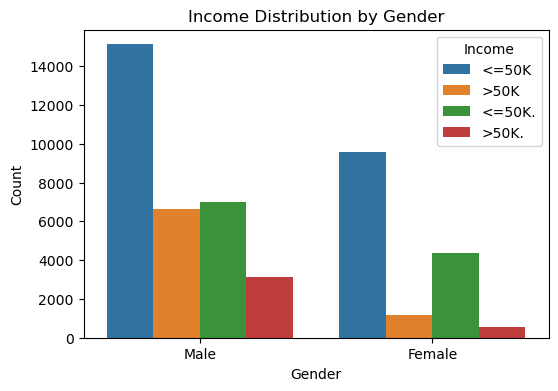

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_copy, x='sex', hue='income')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()


### Income by Race

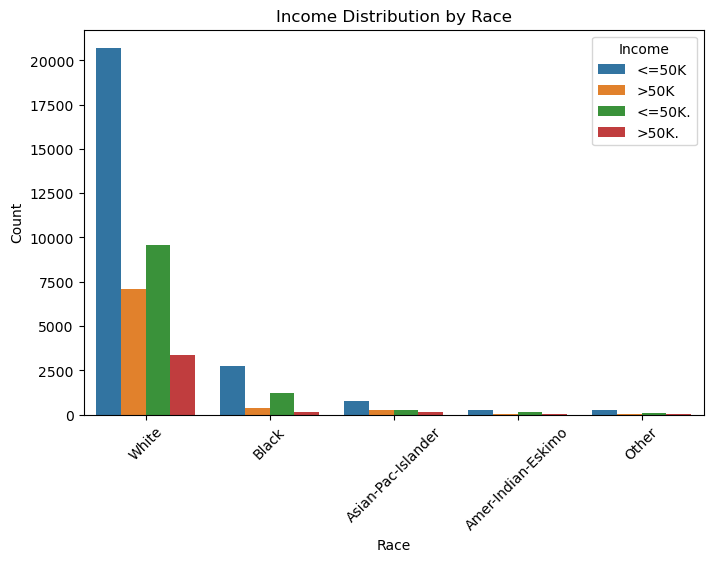

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_copy, x='race', hue='income')
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


### Income Distribution

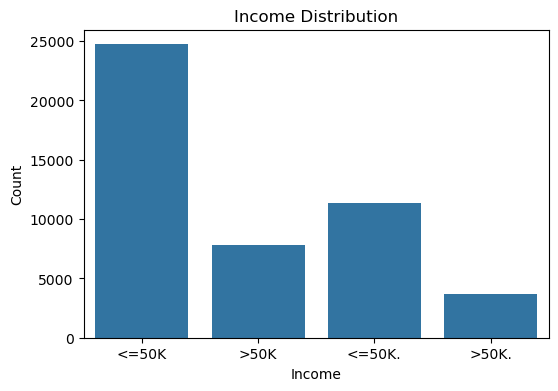

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_copy, x='income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


### Age vs Income



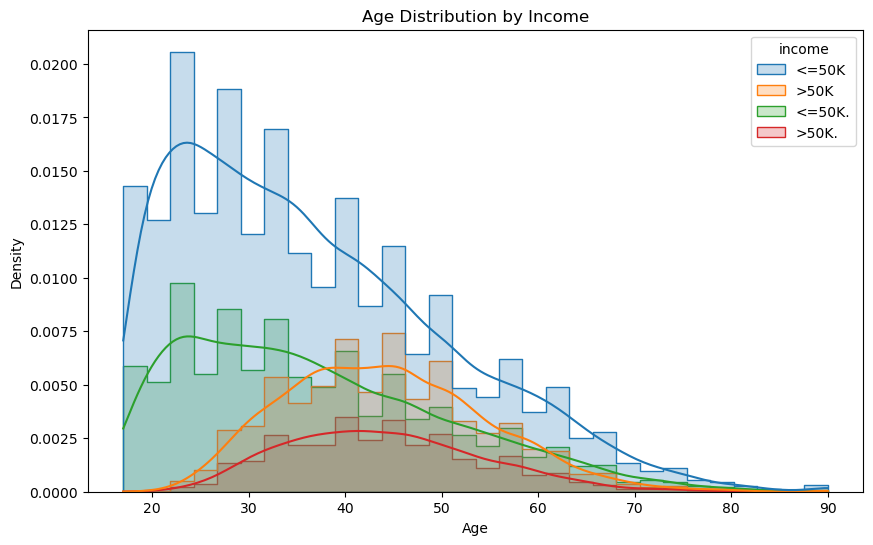

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_copy, x='age', hue='income', bins=30, kde=True, element='step', stat='density')
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


### Hours per Week vs Income

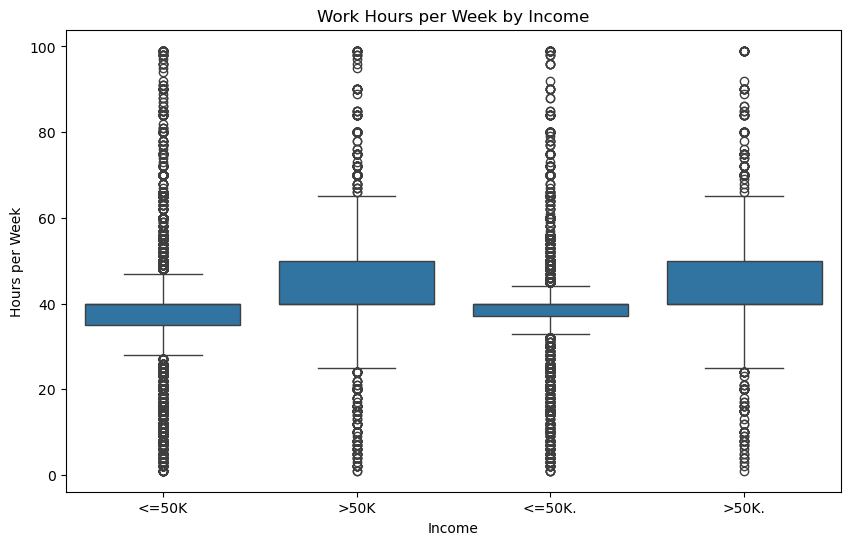

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='income', y='hours-per-week')
plt.title('Work Hours per Week by Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()


###  Education vs Income

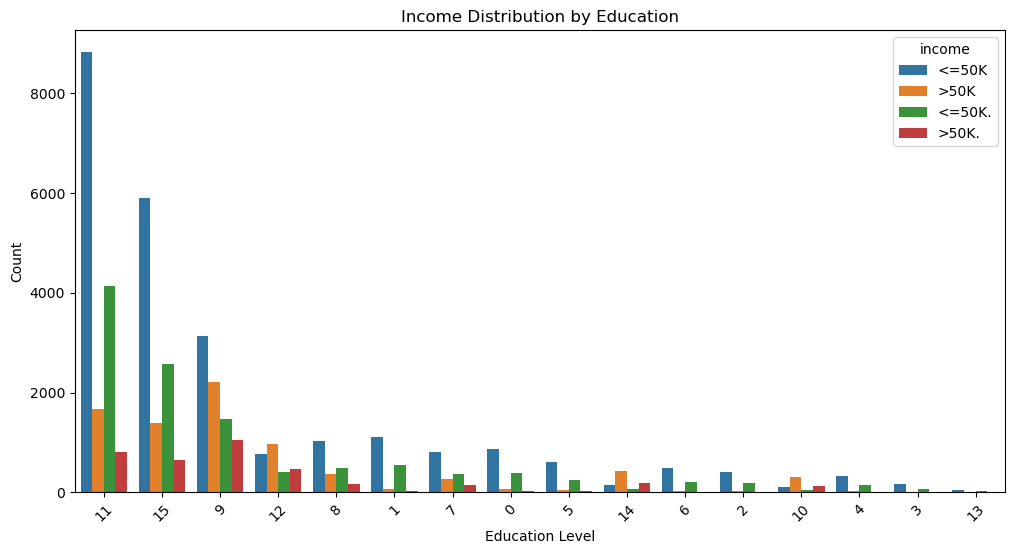

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, x='education', hue='income', order=df_copy['education'].value_counts().index)
plt.title('Income Distribution by Education')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


### Correlation Heatmap

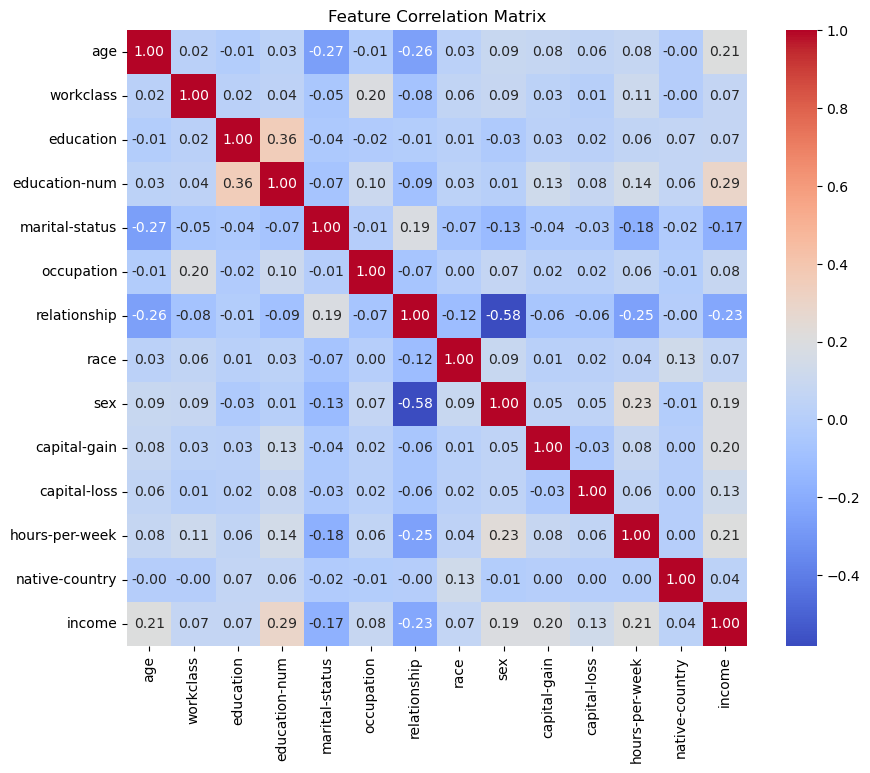

In [23]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


### Bias by Race (Proportion of High Income)

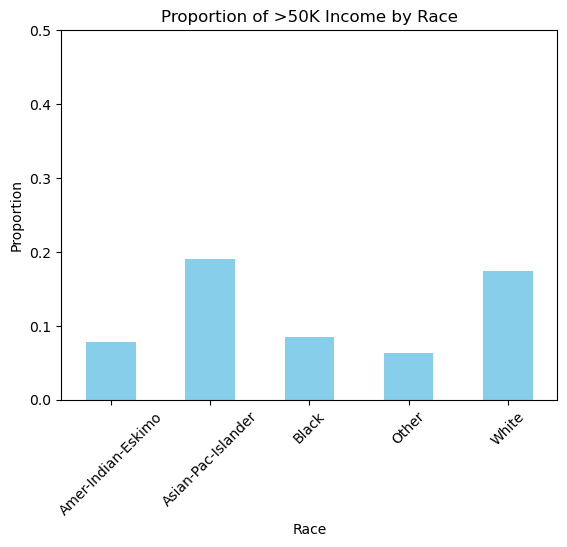

In [24]:
race_income = df_copy[df_copy['income'] == '>50K'].groupby('race').size() / df_copy.groupby('race').size()
race_income.plot(kind='bar', color='skyblue')
plt.title('Proportion of >50K Income by Race')
plt.ylabel('Proportion')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.show()


### Bias by Gender (Proportion of High Income)

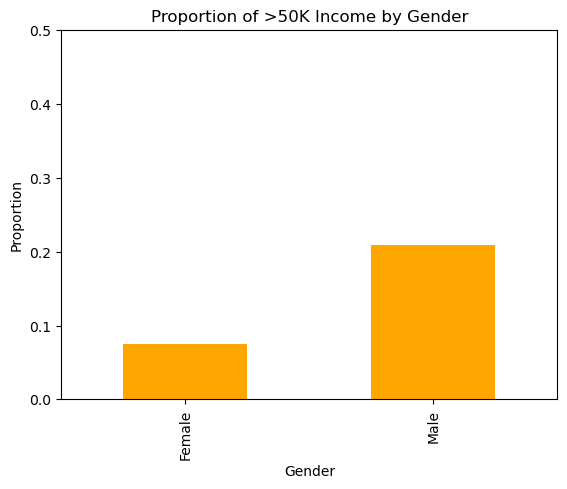

In [25]:
gender_income = df_copy[df_copy['income'] == '>50K'].groupby('sex').size() / df_copy.groupby('sex').size()
gender_income.plot(kind='bar', color='orange')
plt.title('Proportion of >50K Income by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.ylim(0, 0.5)
plt.show()


### Pie Chart: % of >50K by Gender

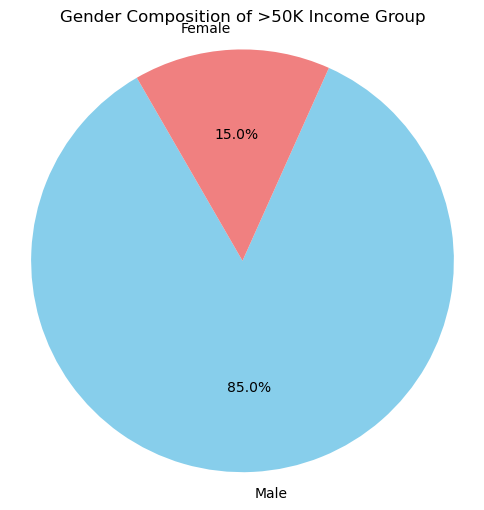

In [26]:
high_income_gender = df_copy[df_copy['income'] == '>50K']['sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(high_income_gender, labels=high_income_gender.index, autopct='%1.1f%%', startangle=120, colors=['skyblue', 'lightcoral'])
plt.title('Gender Composition of >50K Income Group')
plt.axis('equal')
plt.show()


### Race Distribution Pie Chart

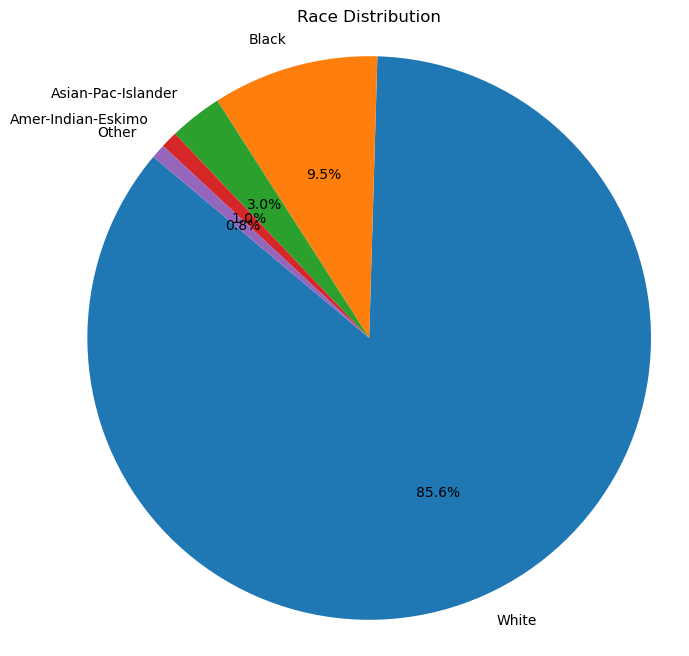

In [27]:
race_counts = df_copy['race'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Race Distribution')
plt.axis('equal')
plt.show()


# Feature Scaling

In [28]:
scaler = StandardScaler()
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# Train a Model

In [54]:
# 🧠 Step 7: Model Training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=2000)

# Evaluate Model

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))



[[4646    0  278    0]
 [2114    1  131    0]
 [ 875    0  742    0]
 [ 415    0  323    0]]
              precision    recall  f1-score   support

           0       0.58      0.94      0.72      4924
           1       1.00      0.00      0.00      2246
           2       0.50      0.46      0.48      1617
           3       0.00      0.00      0.00       738

    accuracy                           0.57      9525
   macro avg       0.52      0.35      0.30      9525
weighted avg       0.62      0.57      0.45      9525



# Bias Analysis

### Gender Bias

In [32]:
# Compare prediction rates between genders
X_test_copy = X_test.copy()
X_test_copy['sex'] = label_encoders['sex'].inverse_transform(X_test_copy['sex'])
X_test_copy['race'] = label_encoders['race'].inverse_transform(X_test_copy['race'])

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['sex'] = X_test_copy['sex']
results['race'] = X_test_copy['race']

gender_group = results.groupby('sex')[['Actual', 'Predicted']].mean()
print("Gender Bias:\n", gender_group)


Gender Bias:
           Actual  Predicted
sex                        
Female  0.539789   0.076702
Male    0.938868   0.424484


### Racial Bias

In [33]:
race_group = results.groupby('race')[['Actual', 'Predicted']].mean()
print("Racial Bias:\n", race_group)


Racial Bias:
                       Actual  Predicted
race                                   
Amer-Indian-Eskimo  0.595960   0.080808
Asian-Pac-Islander  0.857708   0.245059
Black               0.563986   0.117780
Other               0.527778   0.027778
White               0.837430   0.338160


# 🏁 Conclusion:
The machine learning models successfully classified income levels with reasonable accuracy. Feature importance and evaluation metrics helped identify key income predictors like education, hours-per-week, and occupation.

Source:https://github.com/TatobaPadhare33/Adult-Income-Classification-with-Machine-Learning